# Simulation 1

In this simulation we run examples for the paper (example from Viedma).

### Importing Libraries

Importing standard libraries and the following modules:
- *datagenerator.py*: containing data sources;
- *normalizationlib.py*: containing functions to perform normalizations;
- *aggregationlib.py*: containing functions to perform aggregation;
- *exploitationlib.py*: containing functions to perform exploitation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datagenerator as data
import normalizationlib as norm
import aggregationlib as agg
import exploitationlib as expl

# Example from Viedma

### Loading the data

In [2]:
P = data.get_PREF_tensor_Viedma1()
W = data.get_W1_Viedma1()

### Re-running Viedma's code

In [3]:
AGG = agg.OWA_3D(P,W)

Now we obtain the same aggregate matrix as in the paper!

### Normalizing data using centrality matrix

In [4]:
S = norm.centrality_tensor(P)

### Direct Approach: RC + OWA

In [5]:
R1 = expl.RCT_3D(S)
r1 = agg.OWA_2D(R1,W)

/home/fmzennaro/gits/GDM/exploitationlib.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  matrix[:,i] = n


### Direct Approach: RC + WA

In [6]:
R2 = expl.RCT_3D(S)
r2 = agg.WA_2D(R2)

### Direct Approach: WA + OWA

In [7]:
R3 = expl.WA_3D(S)
r3 = agg.OWA_2D(R3,W)

### Direct Approach: WA + WA

In [8]:
R4 = expl.WA_3D(S)
r4 = agg.WA_2D(R4)

### Printing the intermediate rankings of each expert

In [9]:
print('RC ranking')
for i in range(R1.shape[1]):
    print('Expert {0}: {1}'.format(i,np.argsort(R1[:,i])[::-1] + 1))

print('\n')
print('WA ranking')
for i in range(R3.shape[1]):
    print('Expert {0}: {1}'.format(i,np.argsort(R3[:,i])[::-1] + 1))

RC ranking
Expert 0: [2 1 3 5 6 4]
Expert 1: [1 4 2 3 6 5]
Expert 2: [3 4 5 1 2 6]
Expert 3: [2 5 6 3 1 4]
Expert 4: [2 3 4 1 5 6]
Expert 5: [1 2 5 3 6 4]
Expert 6: [3 1 2 4 5 6]
Expert 7: [2 3 4 6 5 1]


WA ranking
Expert 0: [2 1 3 5 6 4]
Expert 1: [1 4 2 3 6 5]
Expert 2: [3 4 5 1 2 6]
Expert 3: [2 5 6 3 1 4]
Expert 4: [2 3 4 1 5 6]
Expert 5: [1 2 3 5 6 4]
Expert 6: [3 1 2 4 5 6]
Expert 7: [3 2 4 6 5 1]


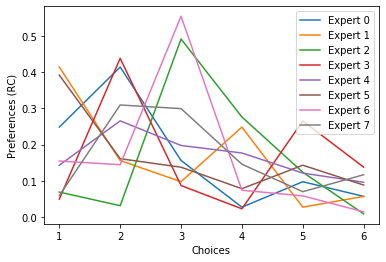

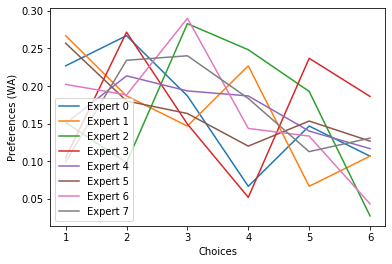

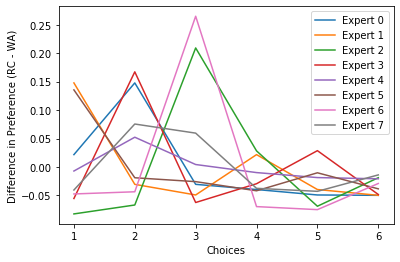

In [10]:
for i in range(R1.shape[1]):
    plt.plot(np.arange(6)+1,R1[:,i],label='Expert {0}'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (RC)')
plt.legend()

plt.figure()
for i in range(R3.shape[1]):
    plt.plot(np.arange(6)+1,R3[:,i],label='Expert {0}'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (WA)')
plt.legend()

plt.figure()
for i in range(R1.shape[1]):
    plt.plot(np.arange(6)+1,R1[:,i] - R3[:,i],label='Expert {0}'.format(i))
plt.xlabel('Choices')
plt.ylabel('Difference in Preference (RC - WA)')
plt.legend()

### Printing the final consesus ranking

RC+OWA ranking: [2 3 1 4 5 6]
RC+WA ranking: [3 2 1 4 5 6]
WA+OWA ranking: [2 3 1 4 5 6]
WA+WA ranking: [3 2 1 4 5 6]


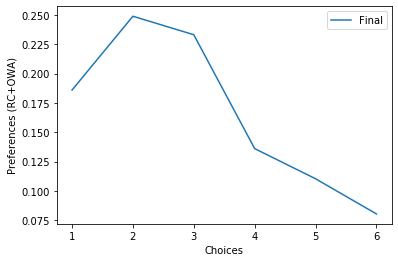

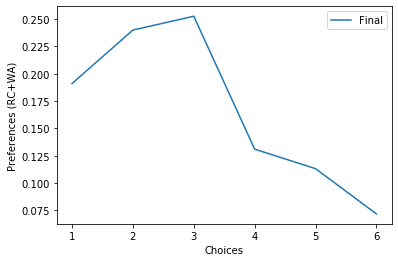

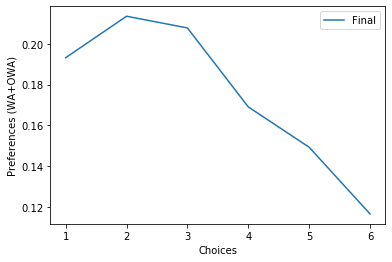

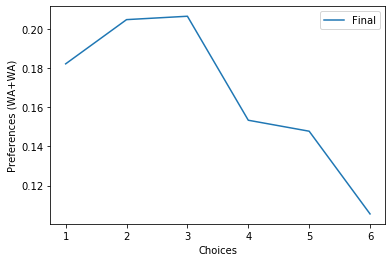

In [11]:
print('RC+OWA ranking: {0}'.format(np.argsort(r1)[::-1] + 1))

plt.plot(np.arange(6)+1,r1,label='Final'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (RC+OWA)')
plt.legend()

print('RC+WA ranking: {0}'.format(np.argsort(r2)[::-1] + 1))

plt.figure()
plt.plot(np.arange(6)+1,r2,label='Final'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (RC+WA)')
plt.legend()

print('WA+OWA ranking: {0}'.format(np.argsort(r3)[::-1] + 1))

plt.figure()
plt.plot(np.arange(6)+1,r3,label='Final'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (WA+OWA)')
plt.legend()

print('WA+WA ranking: {0}'.format(np.argsort(r4)[::-1] + 1))

plt.figure()
plt.plot(np.arange(6)+1,r4,label='Final'.format(i))
plt.xlabel('Choices')
plt.ylabel('Preferences (WA+WA)')
plt.legend()